### Utme Score Prediction
- Using data from jamb(Joint Admission Matriculation Board) 2024

- The aim of this task is to create a model for predicting the performance of students on a standardizes test(column "JAMB_Score")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [5]:
# anonymoulize
df = df.drop("Student_ID", axis=1)

In [6]:
df.nunique()

JAMB_Score                      220
Study_Hours_Per_Week             41
Attendance_Rate                  51
Teacher_Quality                   5
Distance_To_School              201
School_Type                       2
School_Location                   2
Extra_Tutorials                   2
Access_To_Learning_Materials      2
Parent_Involvement                3
IT_Knowledge                      3
Age                               8
Gender                            2
Socioeconomic_Status              3
Parent_Education_Level            3
Assignments_Completed             5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Age                           5000 non-null   int64  
 12  Gender                        5000 non-null   object 
 13  Soc

In [8]:
df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

parent_education_level          891 
Is the only column with empty value

In [9]:
df.columns = df.columns.str.lower()
df.head(2)

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1


In [10]:
df["parent_education_level"].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [11]:
categorical = df.select_dtypes(include=object).columns
categorical

Index(['school_type', 'school_location', 'extra_tutorials',
       'access_to_learning_materials', 'parent_involvement', 'it_knowledge',
       'gender', 'socioeconomic_status', 'parent_education_level'],
      dtype='object')

In [12]:
len(categorical)

9

In [13]:
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")
df[categorical].head()    

,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,gender,socioeconomic_status,parent_education_level
0,public,urban,yes,yes,high,medium,male,low,tertiary
1,public,rural,no,yes,high,high,male,high,NaN
2,public,rural,yes,yes,high,medium,female,high,tertiary
3,public,urban,no,yes,medium,high,female,medium,tertiary
4,public,urban,no,yes,medium,medium,female,medium,tertiary


In [20]:
# fill the empty value with different values (zero and the mean ) to see the effect on the model
df_with_zero = df.fillna(0)


In [28]:
df.mode()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,118,19,100,2,0.0,public,urban,yes,yes,medium,medium,16,female,medium,secondary,1


In [ ]:
value = {"parent_education_level":"secondary"}

In [37]:
df_with_mode =df.fillna(value=value)
# df_with_mode["parent_education_level"] = df_with_mode["parent_education_level"].fillna(df_with_mode["parent_education_level"].mode())

In [39]:
df_with_mode.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [15]:
df_with_zero.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [41]:
import seaborn as sns

In [45]:
# how many females and male do we have?
num_fe =len(df[df['gender']=="female"])
num_ma =len(df[df['gender']=="male"])
print(f'Number of female is {num_fe} and male is {num_ma}')

Number of female is 2530 and male is 2470


<Axes: xlabel='Count', ylabel='gender'>

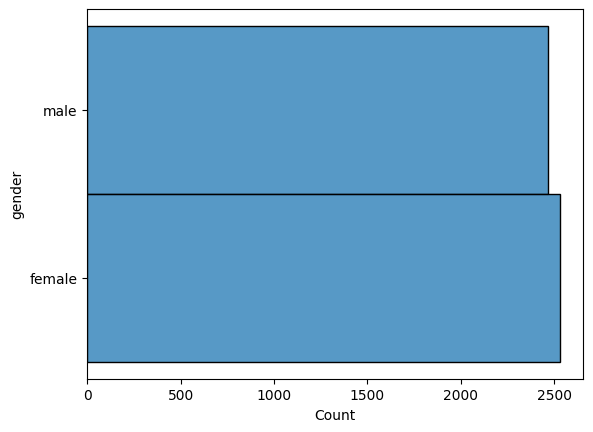

In [43]:
sns.histplot(y=df_with_zero["gender"])

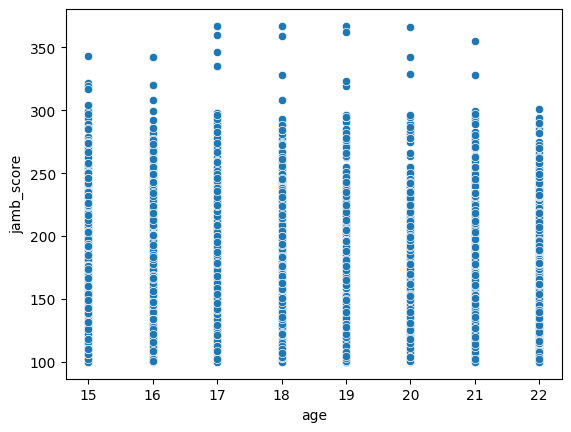

In [44]:
# relationship between utme_score and gender
sns.scatterplot(data=df_with_zero, y="jamb_score", x="age")
plt.show()

<Axes: xlabel='gender', ylabel='jamb_score'>

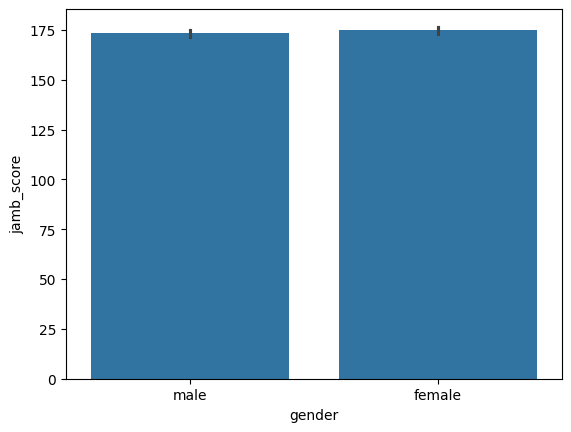

In [45]:
sns.barplot(x=df_with_zero['gender'], y=df_with_zero["jamb_score"])

<Axes: title={'center': 'jamb_score Vs gender'}, xlabel='gender', ylabel='jamb_score'>

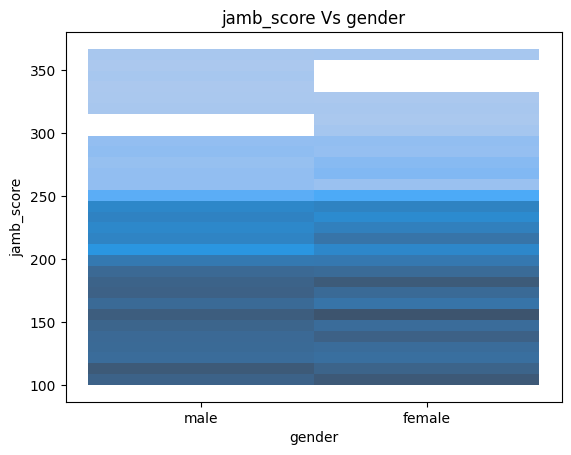

In [46]:
# gender and score
plt.title("jamb_score Vs gender")
sns.histplot(x=df_with_zero['gender'], y=df_with_zero["jamb_score"])

<Axes: xlabel='jamb_score', ylabel='Count'>

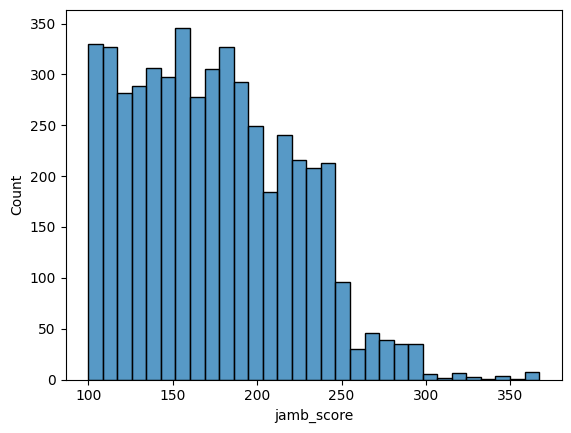

In [47]:
# number of people and thier score
sns.histplot(x=df_with_zero['jamb_score'])

<Axes: xlabel='school_type', ylabel='jamb_score'>

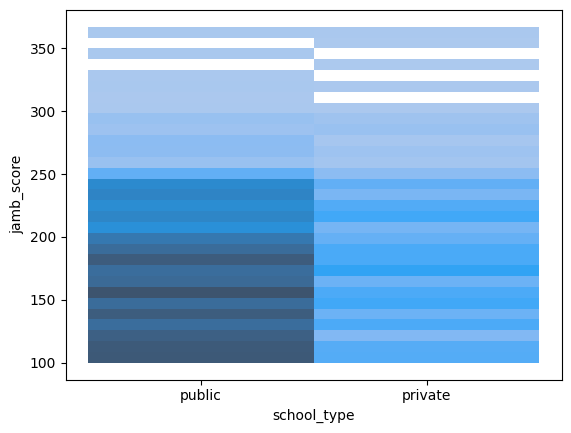

In [48]:
sns.histplot(x=df_with_zero["school_type"], y=df_with_zero["jamb_score"])

###### feature importancs
- -  Check how each feature contributes to the target vairable

In [73]:
for col in df_with_zero.columns:
    print(col, df_with_zero[col].unique())


jamb_score [192 207 182 210 199 202 251 129 220 157 188 158 191 114 146 154 102 106
 238 274 108 159 263 149 101 153 267 133 147 177 239 181 123 140 144 206
 100 223 266 134 104 172 222 136 185 164 113 189 262 231 151 103 122 135
 170 141 156 227 143 161 226 176 169 196 243 138 155 298 236 201 131 116
 197 110 115 228 225 118 232 215 200 211 218 171 183 245 160 119 107 221
 150 126 120 127 247 234 105 145 198 162 166 224 132 283 121 241 204 229
 268 111 244 163 246 295 168 184 179 190 142 212 299 180 249 128 208 195
 112 216 194 152 117 139 165 130 173 277 240 124 137 281 235 219 282 148
 125 250 255 280 193 174 237 178 254 187 256 167 270 230 109 308 175 214
 285 209 292 279 213 186 261 259 291 278 293 264 275 252 253 217 301 233
 260 271 205 242 294 272 203 276 342 289 269 248 320 346 360 257 366 367
 343 322 258 286 359 290 296 297 288 273 284 265 319 287 304 317 328 362
 335 323 329 355]
study_hours_per_week [22 14 29 12 25 35 27 23 15 32  7  2 16 18 40 28 34 11 20 19  0 30 13 21
 

In [64]:
from sklearn.metrics import mutual_info_score

def mutual_info(series):
    m = mutual_info_score(df_with_zero['jamb_score'], series)
    print( m)
    return m
    

In [77]:
# using data with NaN filled with 0
mutual_score_with_zero = {}
for col in df_with_zero.columns:
    score = mutual_info_score(df_with_zero['jamb_score'], df_with_zero[col] )
    print(col, score)
    # mutual_info(df_with_zero[col])
    # mutual_score_with_0[col] = mutual_info(df_with_zero[col])
    mutual_score_with_zero[col] = score 
    

jamb_score 5.1299648879746655
study_hours_per_week 0.7701352753898753
attendance_rate 0.7272253660834277
teacher_quality 0.13512563786079745
distance_to_school 1.8933584429434802
school_type 0.02812474404706912
school_location 0.023479815768582192
extra_tutorials 0.025080439565949145
access_to_learning_materials 0.022239145621831484
parent_involvement 0.0597540052123373
it_knowledge 0.05665987884252728
age 0.15795046915287858
gender 0.02089563553297628
socioeconomic_status 0.06512359522040202


c:\Users\David\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


TypeError: '<' not supported between instances of 'int' and 'str'

In [78]:
mutual_score_with_zero

{'jamb_score': 5.1299648879746655,
 'study_hours_per_week': 0.7701352753898753,
 'attendance_rate': 0.7272253660834277,
 'teacher_quality': 0.13512563786079745,
 'distance_to_school': 1.8933584429434802,
 'school_type': 0.02812474404706912,
 'school_location': 0.023479815768582192,
 'extra_tutorials': 0.025080439565949145,
 'access_to_learning_materials': 0.022239145621831484,
 'parent_involvement': 0.0597540052123373,
 'it_knowledge': 0.05665987884252728,
 'age': 0.15795046915287858,
 'gender': 0.02089563553297628,
 'socioeconomic_status': 0.06512359522040202}

In [76]:
mutual_score_with_mode

{'jamb_score': 5.1299648879746655,
 'study_hours_per_week': 0.7701352753898753,
 'attendance_rate': 0.7272253660834277,
 'teacher_quality': 0.13512563786079745,
 'distance_to_school': 1.8933584429434802,
 'school_type': 0.02812474404706912,
 'school_location': 0.023479815768582192,
 'extra_tutorials': 0.025080439565949145,
 'access_to_learning_materials': 0.022239145621831484,
 'parent_involvement': 0.0597540052123373,
 'it_knowledge': 0.05665987884252728,
 'age': 0.15795046915287858,
 'gender': 0.02089563553297628,
 'socioeconomic_status': 0.06512359522040202,
 'parent_education_level': 0.05270200019632375,
 'assignments_completed': 0.12820938188616854}

jamb_score 5.1299648879746655
study_hours_per_week 0.7701352753898753
attendance_rate 0.7272253660834277
teacher_quality 0.13512563786079745
distance_to_school 1.8933584429434802
school_type 0.02812474404706912
school_location 0.023479815768582192
extra_tutorials 0.025080439565949145
access_to_learning_materials 0.022239145621831484
parent_involvement 0.0597540052123373
it_knowledge 0.05665987884252728
age 0.15795046915287858
gender 0.02089563553297628
socioeconomic_status 0.06512359522040202
parent_education_level 0.05270200019632375
assignments_completed 0.12820938188616854



- From the mutual importance carried out the followingf can be deduce
1. 'study_hours_per_week': 0.7701352753898753 has the highest importnace compare to other features

<Axes: >

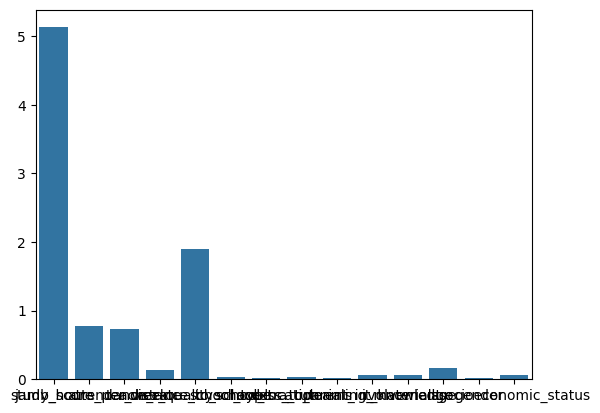

In [84]:
sns.barplot(mutual_score_with_zero)

In [69]:
numerical = df_with_zero.select_dtypes(include='number').columns

In [70]:
numerical

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'age',
       'assignments_completed'],
      dtype='object')

In [71]:
df_with_zero[numerical].corrwith(df_with_zero["jamb_score"])

jamb_score               1.000000
study_hours_per_week     0.420061
attendance_rate          0.280953
teacher_quality          0.299505
distance_to_school      -0.094142
age                     -0.028432
assignments_completed    0.278079
dtype: float64

- - useful functions

In [86]:
# split data function
from sklearn.model_selection import train_test_split
def split_data(data):
    df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25,random_state=1)
    return df_train, df_val, df_test

In [87]:
# encode function
from sklearn.feature_extraction import DictVectorizer
def encodeValue(data_tr, data_val):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(data_tr.to_dict(orient ="records"))
    X_val = dv.transform(data_val.to_dict(orient ="records"))
    return X_train, X_val 

In [88]:
from sklearn.tree import DecisionTreeRegressor

def train_model_dt(X_tr,y_tr, max_d=1):
    dt = DecisionTreeRegressor(max_depth=max_d)
    dt.fit(X_tr, y_tr)
    return dt

In [94]:
from sklearn.ensemble import RandomForestRegressor
def train_model_rf(X_tr,y_tr):
    rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
    rf.fit(X_tr, y_tr)
    return rf    

In [90]:
from sklearn.linear_model import LinearRegression

def train_model_lr(X_tr,y_tr):
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    return lr

In [99]:
from sklearn.linear_model import LogisticRegression
def train_model_lg(X_tr, y_tr):
    lg =LogisticRegression()
    lg.fit(X_tr, y_tr)
    return lg

##### data treat

missing values with zero

In [91]:
df_train_with_zero, df_val_with_zero, df_test_with_zero = split_data(df_with_zero)
len(df_train_with_zero), len(df_val_with_zero), len(df_test_with_zero)

(3000, 1000, 1000)

In [92]:
# extract target vairable
y_train_with_zero = df_train_with_zero["jamb_score"]
y_val_with_zero = df_val_with_zero["jamb_score"]
del  df_train_with_zero["jamb_score"]
del  df_val_with_zero["jamb_score"]

In [93]:
# get X and train
X_train_with_zero, X_val_with_zero = encodeValue(df_train_with_zero, df_val_with_zero)
len(X_train_with_zero), len(X_val_with_zero)

(3000, 1000)

In [100]:
# train with different models
dt_with_zero = train_model_dt(X_train_with_zero,y_train_with_zero)
rf_with_zero = train_model_rf(X_train_with_zero, y_train_with_zero)
lr_with_zero = train_model_lr(X_train_with_zero, y_train_with_zero)
lg_with_zero = train_model_lg(X_train_with_zero, y_train_with_zero)


c:\Users\David\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
lr_with_zero.score(X_train_with_zero, y_train_with_zero)

0.33647754978577915

In [102]:
dt_with_zero.score(X_train_with_zero,y_train_with_zero)

0.12513546804009779

In [103]:
rf_with_zero.score(X_train_with_zero,y_train_with_zero)

0.8572186165506117

In [104]:
lg_with_zero.score(X_train_with_zero, y_train_with_zero)

0.046

with mode


In [105]:
df_train_with_mode, df_val_with_mode, df_test_with_mode = split_data(df_with_mode)
len(df_train_with_mode), len(df_val_with_mode), len(df_test_with_mode)

(3000, 1000, 1000)

In [106]:
# extract target vairable
y_train_with_mode = df_train_with_mode["jamb_score"]
y_val_with_mode = df_val_with_mode["jamb_score"]
del  df_train_with_mode["jamb_score"]
del  df_val_with_mode["jamb_score"]

In [107]:
# get X and train
X_train_with_mode, X_val_with_mode = encodeValue(df_train_with_mode, df_val_with_mode)
len(X_train_with_mode), len(X_val_with_mode)

(3000, 1000)

In [108]:
# train with different models
dt_with_mode = train_model_dt(X_train_with_mode,y_train_with_mode)
rf_with_mode = train_model_rf(X_train_with_mode, y_train_with_mode)
lr_with_mode = train_model_lr(X_train_with_mode, y_train_with_mode)
lg_with_mode = train_model_lg(X_train_with_mode, y_train_with_mode)

c:\Users\David\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
dt_with_mode.score(X_train_with_mode,y_train_with_mode)

0.12513546804009779

In [110]:
lr_with_mode.score(X_train_with_mode,y_train_with_mode)

0.33496834933856745

In [111]:
rf_with_mode.score(X_train_with_mode,y_train_with_mode)

0.8570888731269141

In [112]:
lg_with_mode.score(X_train_with_mode,y_train_with_mode)

0.047